In [29]:
import numpy
import matplotlib.pyplot as plt

# Define function make_maze that returns a maze
def make_maze(w = 8, h = 8):
    # Create a 2D array to store the squares visited by the walk() function, 1 means visited
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    # Create a 2D array to store the vertical walls, 11 means wall, 00 means no wall
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    # Create a 2D array to store the horizontal walls, 11 means wall, 00 means no wall
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    # Define walk() function that will walk through the maze, visited squares are saved to vis
    def walk(x, y):
        vis[y][x] = 1

        # Create a list of the four directions and shuffle them
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        numpy.random.shuffle(d)

        # Walk though the mase in the directions listed in d
        for (xx, yy) in d:
            # If the square has already been visited, continue
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            # Repeat until all squares are visited
            walk(xx, yy)

    # Start walk from a random position
    walk(numpy.random.randint(w), numpy.random.randint(h))

    # Loop through the walls and create a string of the maze
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    # Loop through the string and create a 2D array of the maze
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)

    # Return the maze
    return M

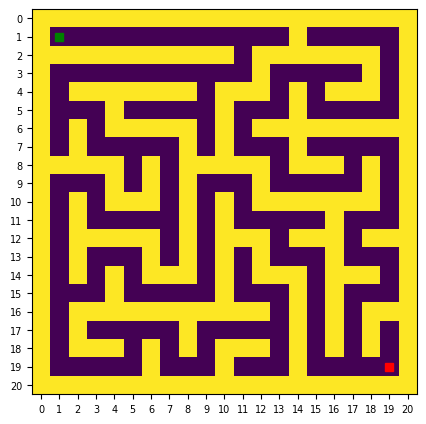

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1]
 [1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [30]:
# Configure properties for the maze and create it, only square mazes are working for now
maze_width=8
maze_height=8
startLocation=(1,1)
targetLocation=(maze_width*2-1,maze_height*2-1)
maze=numpy.array(make_maze(maze_width,maze_height))

# Create a maze figure
plt.figure(figsize=[maze_width/2,maze_height/2])
# Plot the maze
plt.imshow(maze)
# Show tick for each square
plt.xticks(range(0, maze_width*2+1))
plt.yticks(range(0, maze_height*2+1))
# Set the tick label size
plt.tick_params(axis='both', labelsize=7)
# Show the start and target locations
plt.plot(startLocation[0], startLocation[1], 'gs')
plt.plot(targetLocation[0], targetLocation[1], 'rs')
# Show the plot
plt.show()
print(maze)

In [31]:
# Initialize the policy where each action has equal probability
policy = numpy.ones((maze_width*2+1, maze_width*2+1, 4)) / 4.0
# Normalize the policy
for i in range(maze_width*2+1):
    for j in range(maze_width*2+1):
        policy[i][j] /= policy[i][j].sum()

# Set the learning rate
learning_rate = 0.01

# Create a list to store the steps for each run
L = []
# Run the algorithm x times
for i in range(200):
    # Create a 2D array to store the visited squares
    visited = numpy.zeros((maze_width*2+1, maze_width*2+1))
    # Set the start location
    x = 1
    y = 1
    # Set the movement directions
    xm = [0, 1, 0, -1]
    ym = [1, 0, -1, 0]
    # Create a list to store the path
    trackX = [x]
    trackY = [y]
    # Create a list to store the actions
    actions = []
    # Set the start location as visited
    visited[x][y] = 1
    # Loop until the target location is reached
    while x != targetLocation[0] or y != targetLocation[1]:
        # Choose a direction based on the policy
        direction = numpy.random.choice([0, 1, 2, 3], p=policy[x][y])
        # Move to the next square
        tx = x + xm[direction]
        ty = y + ym[direction]
        # If the square is not a wall, move to it, mark it as visited, add it to the path and save the action
        if maze[tx][ty] == 0:
            x = tx
            y = ty
            visited[x][y] += 1
            trackX.append(x)
            trackY.append(y)
            actions.append(direction)

    # Update the policy based on the actions taken
    for i in range(len(actions)):
        policy[trackX[i]][trackY[i]][actions[i]] += learning_rate
    # Normalize the policy
    for i in range(maze_width*2+1):
        for j in range(maze_width*2+1):
            policy[i][j] /= policy[i][j].sum()
    # Save the number of steps taken for this run
    L.append(len(actions))

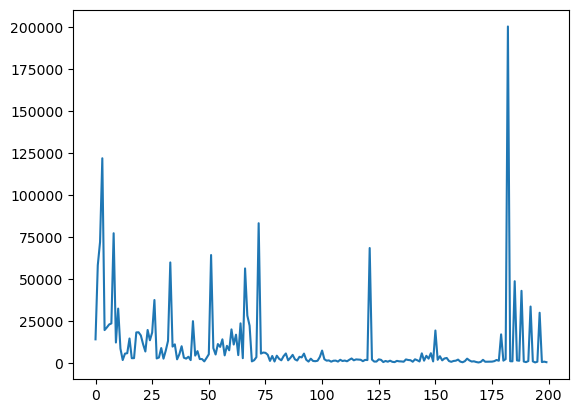

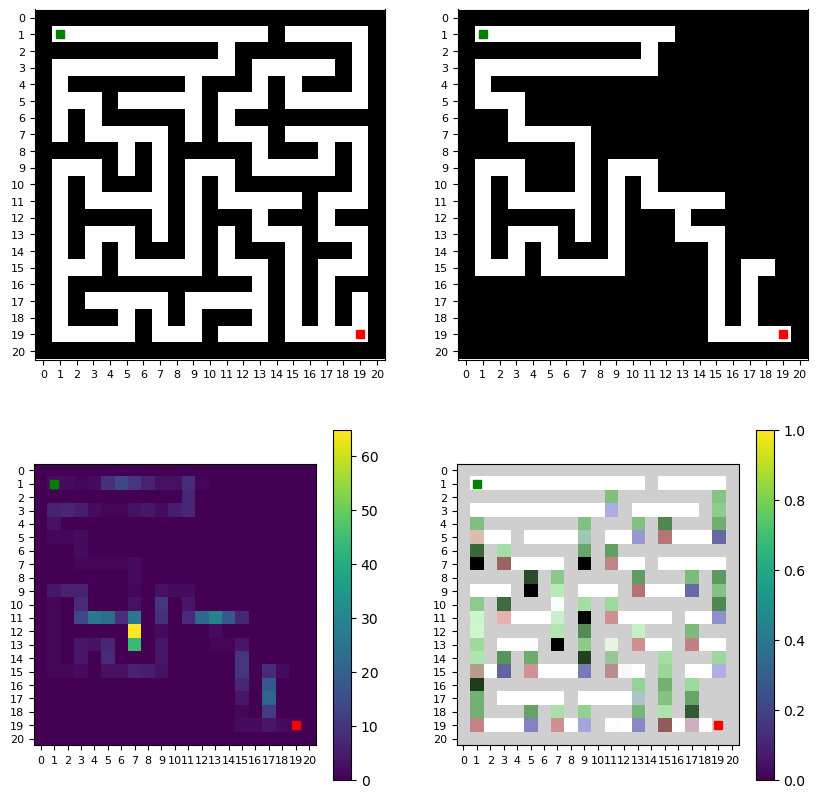

In [32]:
# Plot the number of steps for each run
plt.plot(L)

# Create a figure with 4 subplots
plt.figure(figsize=[maze_width,maze_height])

# Plot the maze
plt.subplot(2, 2, 1)
plt.imshow(maze, cmap='binary')
plt.xticks(range(0, maze_width*2+1))
plt.yticks(range(0, maze_height*2+1))
plt.tick_params(axis='both', labelsize=8)
plt.plot(startLocation[0], startLocation[1], 'gs')
plt.plot(targetLocation[0], targetLocation[1], 'rs')

# Plot the visited squares in black and white
plt.subplot(2, 2, 2)
plt.imshow(visited,cmap='gray',vmax=1)
plt.xticks(range(0, maze_width*2+1))
plt.yticks(range(0, maze_height*2+1))
plt.tick_params(axis='both', labelsize=8)
plt.plot(startLocation[0], startLocation[1], 'gs')
plt.plot(targetLocation[0], targetLocation[1], 'rs')

# Plot the visited squares by number of visits
plt.subplot(2, 2, 3)
plt.imshow(visited)
plt.xticks(range(0, maze_width*2+1))
plt.yticks(range(0, maze_height*2+1))
plt.tick_params(axis='both', labelsize=8)
plt.plot(startLocation[0], startLocation[1], 'gs')
plt.plot(targetLocation[0], targetLocation[1], 'rs')
plt.colorbar()

# Plot the movement policy
plt.subplot(2, 2, 4)
plt.imshow(policy)
plt.xticks(range(0, maze_width*2+1))
plt.yticks(range(0, maze_height*2+1))
plt.tick_params(axis='both', labelsize=8)
plt.plot(startLocation[0], startLocation[1], 'gs')
plt.plot(targetLocation[0], targetLocation[1], 'rs')
plt.colorbar()

# Show the figure
plt.show()